
**Question 1: The Data Science Problem**

### **Problem Statement**
The dataset provided by the Federal Aviation Administration (FAA) contains records of reported wildlife strikes to civil aircraft in the United States from 1990 to 2023. These incidents have led to both human and material losses, with trends influenced by environmental factors, wildlife population changes, and increases in air traffic. The primary goal of this practicum is to analyze this dataset comprehensively, identifying key trends, patterns, and risk factors associated with wildlife strikes to civil aircraft.

### **Objective**
The data science problem involves conducting  (EDA) and statistical testing to understand the impact of wildlife strikes on aviation safety. The following key objectives will be addressed:

1. Data Cleaning and Preperation

2. EDA

3. Hypothesis Testing

4. Stastistal Modeling

5. Key Findings and Insights

6. Geospatial Modeling


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Import necessary libraries
df = pd.read_csv('/content/drive/My Drive/DS_PRACTICUM 2 DATA SET/Bird_Strikes_1990_2023.csv') # Read and open CSV file
df.head()

<ipython-input-83-df417240dab2>:6: DtypeWarning: Columns (18,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/My Drive/DS_PRACTICUM 2 DATA SET/Bird_Strikes_1990_2023.csv') # Read and open CSV file


INDEX_NR INCIDENT_DATE  INCIDENT_MONTH  INCIDENT_YEAR TIME TIME_OF_DAY  \
0    608242     6/22/1996               6           1996  NaN         NaN   
1    608243     6/26/1996               6           1996  NaN         NaN   
2    608244      7/1/1996               7           1996  NaN         NaN   
3    608245      7/1/1996               7           1996  NaN         NaN   
4    608246      7/1/1996               7           1996  NaN         NaN   

  AIRPORT_ID                      AIRPORT  LATITUDE  LONGITUDE  ...    SIZE  \
0       KSMF              SACRAMENTO INTL  38.69542 -121.59077  ...  Medium   
1       KDEN          DENVER INTL AIRPORT  39.85841 -104.66700  ...  Medium   
2       KOMA              EPPLEY AIRFIELD  41.30252  -95.89417  ...  Medium   
3       KIAD  WASHINGTON DULLES INTL ARPT  38.94453  -77.45581  ...  Medium   
4       KLGA              LA GUARDIA ARPT  40.77724  -73.87261  ...  Medium   

  NR_INJURIES NR_FATALITIES                COMMENTS REPORTED_NAME  \
0         NaN           NaN  /Legacy Record=100001/      REDACTED   
1         NaN           NaN  /Legacy Record=100002/      REDACTED   
2         NaN           NaN  /Legacy Record=100003/      REDACTED   
3         NaN           NaN  /Legacy Record=100004/      REDACTED   
4         NaN           NaN  /Legacy Record=100005/      REDACTED   

  REPORTED_TITLE                SOURCE                    PERSON     LUPDATE  \
0       REDACTED  Air Transport Report  Air Transport Operations  12/20/2007   
1       REDACTED  Air Transport Report  Air Transport Operations  12/20/2007   
2       REDACTED  Air Transport Report  Air Transport Operations  12/20/2007   
3       REDACTED  Air Transport Report  Air Transport Operations  12/20/2007   
4       REDACTED  Air Transport Report  Air Transport Operations  12/20/2007   

  TRANSFER  
0    False  
1    False  
2    False  
3    False  
4    False  

[5 rows x 100 columns]

Question 2: Data Cleaning


In [ ]:
# inspecting the data:
print(df.info())
print(df.describe())
print(df.head())

# cleaning data:

# missing values:
# rows are useless if they dont have date, year, and location info
df.dropna(subset=["INCIDENT_DATE", "INCIDENT_YEAR", "AIRPORT_ID", "LATITUDE", "LONGITUDE"], inplace=True)
df.fillna({"TIME_OF_DAY": "Unknown", "PHASE_OF_FLT": "Unknown", "SPECIES": "Unknown"}, inplace=True)

# Convert date columns to datetime
df["INCIDENT_DATE"] = pd.to_datetime(df["INCIDENT_DATE"], errors='coerce')
df["INCIDENT_YEAR"] = df["INCIDENT_YEAR"].astype(int)

# missing speed numbers -> median keeps distribution untouched
df = df.assign(
    SPEED=df["SPEED"].fillna(df["SPEED"].median()),
    HEIGHT=df["HEIGHT"].fillna(df["HEIGHT"].median()),
    DISTANCE=df["DISTANCE"].fillna(df["DISTANCE"].median())
)

# duplicate removal
df.drop_duplicates(inplace=True)

print("\n\nDetailed Summary Statistics:")
print("Continuous Variables:")
for col in ["SPEED", "HEIGHT", "DISTANCE"]:
    print(f"{col} - Mean: {df[col].mean():.2f}, Median: {df[col].median():.2f}, Std Dev: {df[col].std():.2f}, Missing: {df[col].isna().sum()}")

print("\n\nCategorical Variables:")
for col in ["TIME_OF_DAY", "AIRPORT_ID", "SPECIES"]:
    print(f"{col} - Mode: {df[col].mode()[0]}, Unique: {df[col].nunique()}, Missing: {df[col].isna().sum()}")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288810 entries, 0 to 288809
Data columns (total 100 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   INDEX_NR               288810 non-null  int64  
 1   INCIDENT_DATE          288810 non-null  object 
 2   INCIDENT_MONTH         288810 non-null  int64  
 3   INCIDENT_YEAR          288810 non-null  int64  
 4   TIME                   163633 non-null  object 
 5   TIME_OF_DAY            166394 non-null  object 
 6   AIRPORT_ID             288804 non-null  object 
 7   AIRPORT                288810 non-null  object 
 8   LATITUDE               253309 non-null  float64
 9   LONGITUDE              253308 non-null  float64
 10  RUNWAY                 218852 non-null  object 
 11  STATE                  253309 non-null  object 
 12  FAAREGION              253309 non-null  object 
 13  LOCATION               33939 non-null   object 
 14  ENROUTE_STATE          5037 non-nul

## Problem 3:
Question 3 — Perform Exploratory Data Analysis (40 pts)

Perform an in-depth analysis by creating visualizations to understand the distribution and relationships within the data, while ensuring that your analysis and explanation of the results tell a story. It's important to select appropriate visualizations based on the type of data. Explain all results.

Analyze the proportion of incidents that occur each year.
Evaluate the distribution of bird strikes in each state and display the top 20 states.
What is the most common bird species that are involved in bird strikes.
Perform a comparative analysis of the annual aircraft damage for each phase of flight. Evaluate the results over the last 10 years to determine what patterns exist. Note: this requires a year over year analysis.
Analyze the frequency of bird strike incidents that occur on a monthly basis over the last 10 years. Analyze the results to determine when these incidents are more prevalent.  This question requires you to drill deeper into the analysis to determine if the distribution has changed over the last 10 years. Note: this requires a year over year analysis.
Perform ONE (1) additional analysis on the distribution. Ensure that you either : 1) perform a comparative analysis by evaluating 3 or more groups within the data or 2) perform a temporal analysis of the patterns over 10 or more years (this requires a year over year analysis of the patterns). Do not repeat any of the previous analysis.


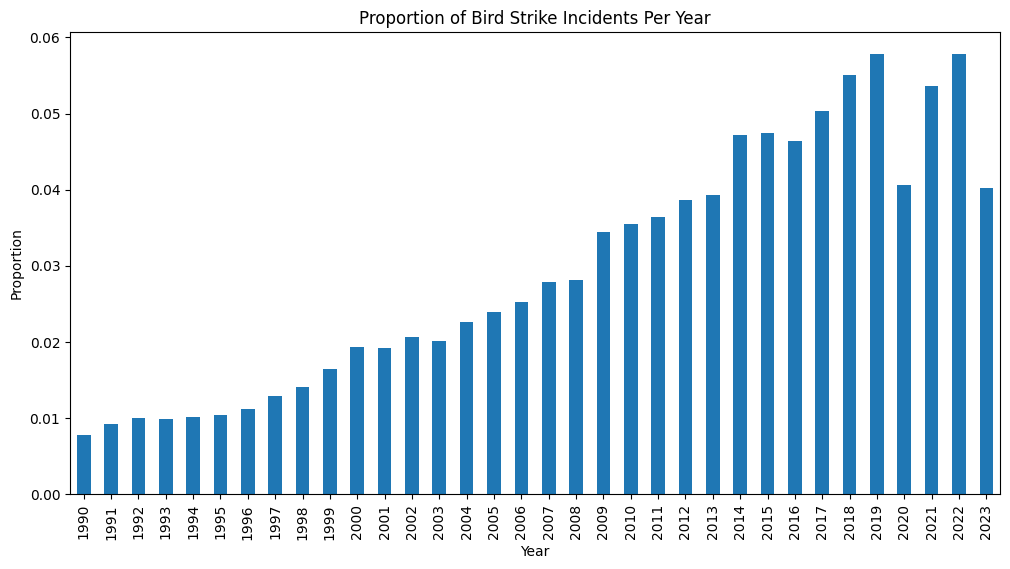

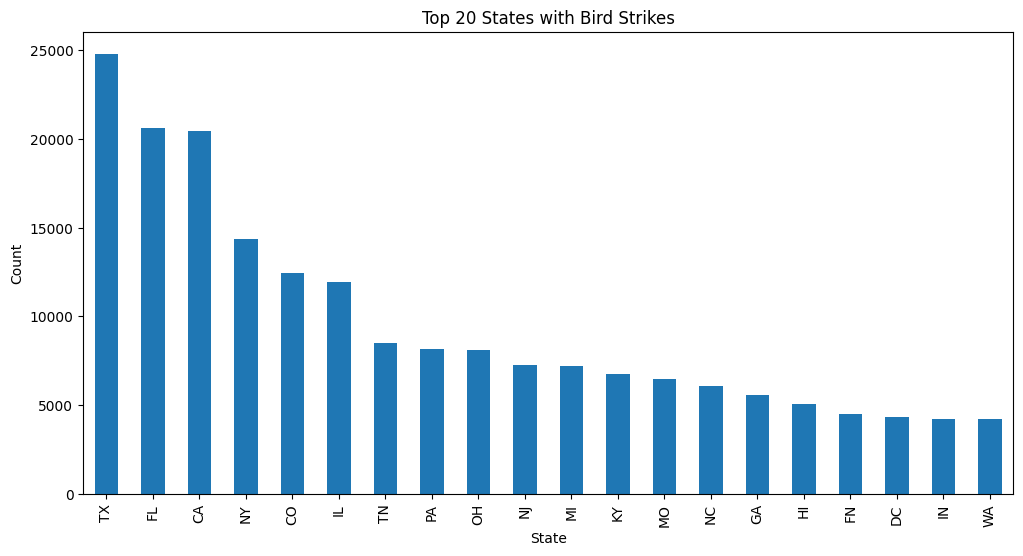

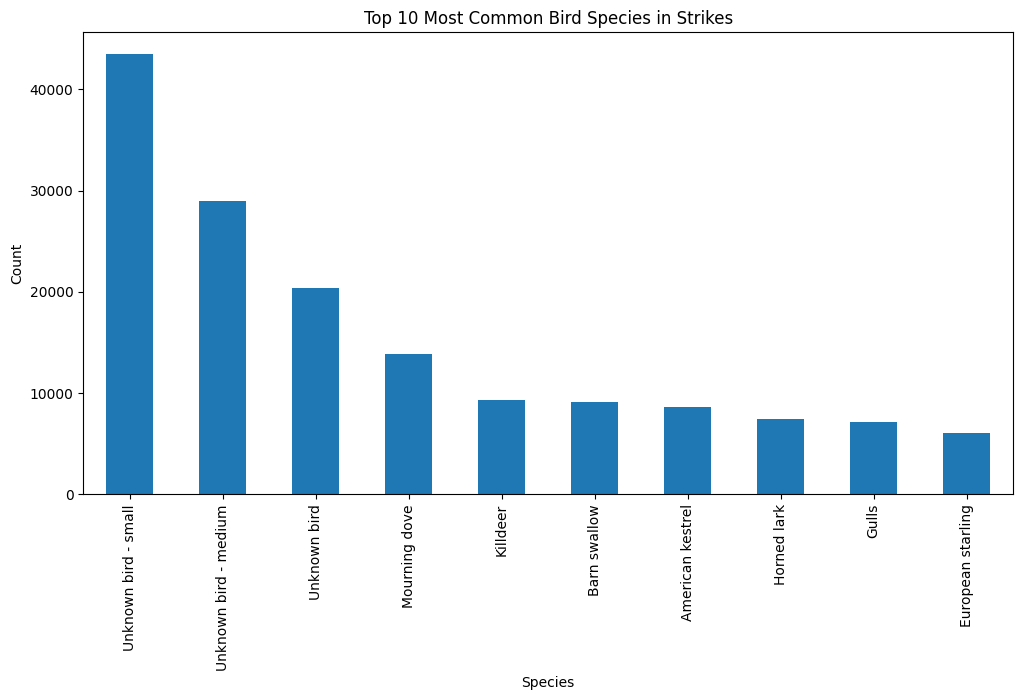

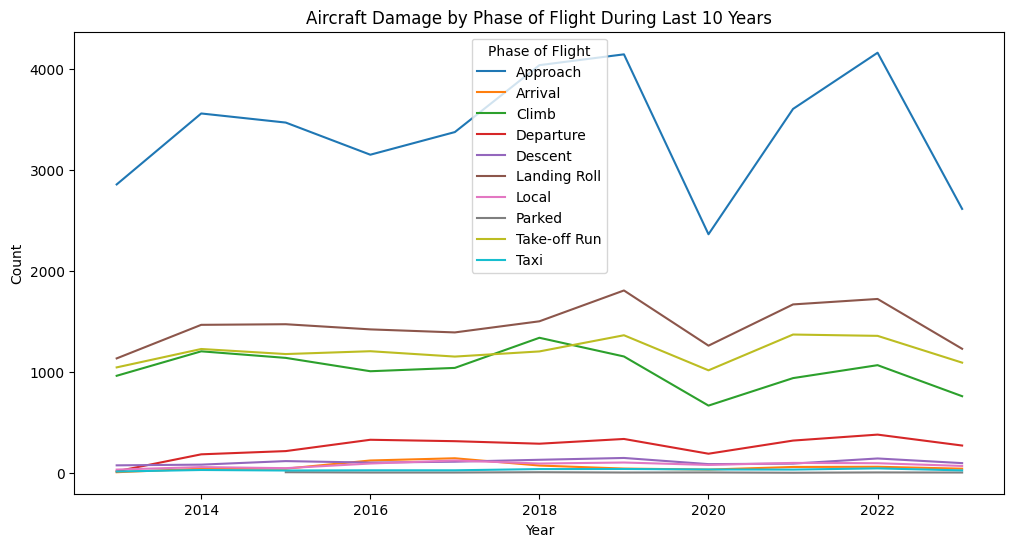

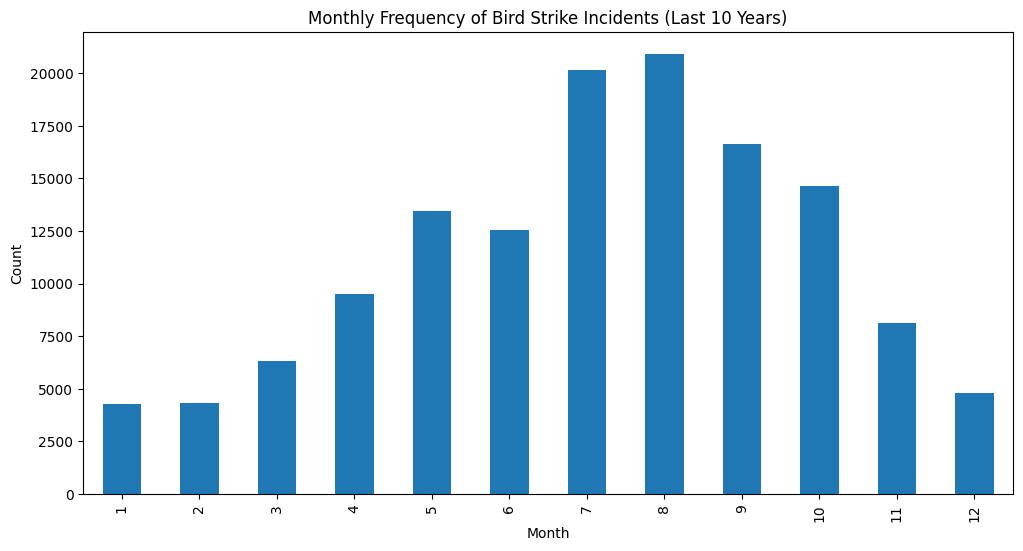

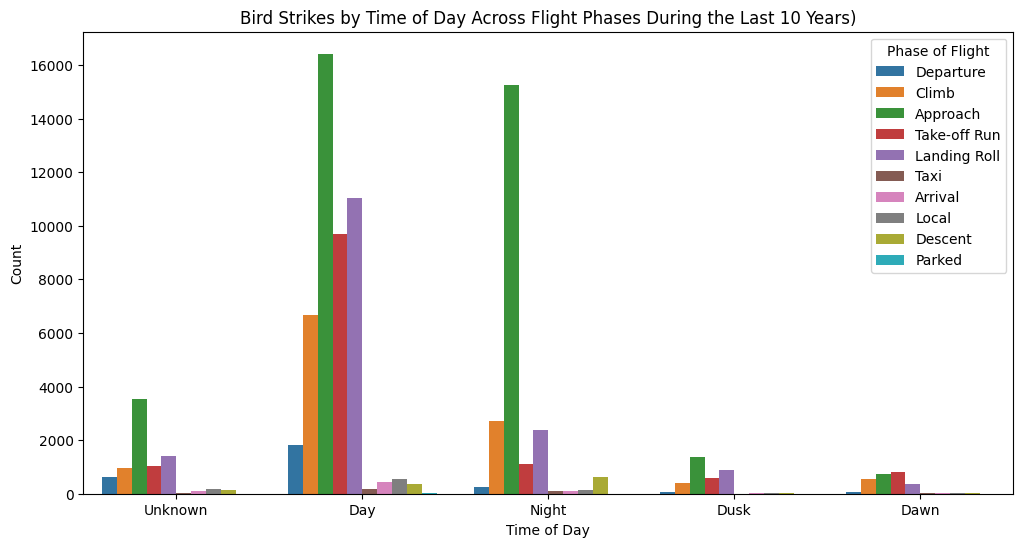

In [ ]:
# QUESTION 3: Exploratory Data Analysis

# 1. proportion of incidents per year
df_yearly = df.groupby("INCIDENT_YEAR").size()
df_yearly = df_yearly / df_yearly.sum()
df_yearly.plot(kind='bar', figsize=(12, 6))

plt.title("Proportion of Bird Strike Incidents Per Year")
plt.xlabel("Year")
plt.ylabel("Proportion")
plt.show()

# 2. Top 20 states with most incidents
top_states = df["STATE"].value_counts().head(20)
top_states.plot(kind='bar', figsize=(12, 6))

plt.title("Top 20 States with Bird Strikes")
plt.xlabel("State")
plt.ylabel("Count")
plt.show()

# 3. Most common bird species
plt.figure(figsize=(12, 6))
df["SPECIES"].value_counts().head(10).plot(kind='bar')

plt.title("Top 10 Most Common Bird Species in Strikes")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()

# 4. YoY analysis of aircraft damage by phase of flight (last 10 years)

# choose data within last 10 years:
df_recent = df[df["INCIDENT_YEAR"] >= (df["INCIDENT_YEAR"].max() - 10)]
# group by year, and phase of flight
df_damage = df_recent.groupby(["INCIDENT_YEAR", "PHASE_OF_FLIGHT"]).size().unstack()
# plot
df_damage.plot(figsize=(12, 6))
# label:
plt.title("Aircraft Damage by Phase of Flight During Last 10 Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title="Phase of Flight")
plt.show()



# 5. Monthly frequency of bird strike incidents (last 10 years)
df_monthly = df_recent.groupby("INCIDENT_MONTH").size()
df_monthly.plot(kind='bar', figsize=(12, 6))
# plot:
plt.title("Monthly Frequency of Bird Strike Incidents (Last 10 Years)")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

# 6. Additional Analysis: Bird strikes by time of day across phases of flight
plt.figure(figsize=(12, 6))
# source: https://seaborn.pydata.org/generated/seaborn.countplot.html
sns.countplot(data=df_recent, x="TIME_OF_DAY", hue="PHASE_OF_FLIGHT")
# label:
plt.title("Bird Strikes by Time of Day Across Flight Phases During the Last 10 Years)")
plt.xlabel("Time of Day")
plt.ylabel("Count")
plt.legend(title="Phase of Flight")
plt.show()


## QUESTION 3: Explanation of Results

1. Proportion of Bird Strike Incidents Per Year

This graph presents the relative proportion of incidents per year rather than raw counts. This allows for a fair comparison between years, accounting for variations in total flight activity. The proportion increases YoY and peaks in 2019 and 2022 but then proceeds to drop in 2023.

2. Top 20 States with Bird Strikes
This bar chart highlights the states with the highest number of bird strikes. The results suggest that states with large airports and major flight paths, such as Texas, Florida, and California, experience the most incidents. Geographic and environmental factors, such as bird migration, also likely play a role in these numbers.

3. Top 10 Most Common Bird Species in Strikes

This visualization reveals the bird species most frequently involved in collisions. Understanding which species are most affected can help aviation authorities develop better mitigation strategies. The highes species were Unknown-small which makes sense because it is quite hard to identify the type of bird that hits an aircraft, there are also a much higher number of small birds than big birds.

4. Aircraft Damage by Phase of Flight (Last 10 Years)

This graph breaks down bird strikes by the phase of flight over the past decade. Phases such as approach, and unknown had the highest strike rates since aircraft are at lower altitudes where birds are more prevalent.

5. Monthly Frequency of Bird Strikes (Last 10 Years)

This analysis examines how bird strike incidents vary by month. July and August had the highest bird strikes. Peaks in certain months may align with bird migration seasons, providing insight into when the risk is highest. Aviation authorities could plan preventative measures accordingly to minimize strikes during the risky seasons.

6. Bird Strikes by Time of Day Across Flight Phases (Last 10 Years)

This final graph examines the relationship between the time of day and the phase of flight during which strikes occur. Higher incident rates during day and night suggest that birds are most active at these times. This insight can be useful for adjusting flight schedules or implementing mitigation strategies at high-risk hours.



Question 4 - Hypothesis Testing (30 points)

Perform pairwise analysis of select features and evaluate the significance of the pattern or trend. A suitable value for alpha is 5%. Explain all results.

Create a scatterplot that shows the relationship between aircraft height and speed. Evaluate the correlation, the strength and the significance of the results.
Visualize the distribution of the aircraft speed during: 1) the approach phase of flight and 2) the landing roll phase of flight. Perform a 2 sample t-test and evaluate if there is a statistical difference between the speed during these two flight phases. Tip: if the data is skewed, you will need to address this prior to the statistical analysis.
Create a visualization of the aircraft damage grouped by phase of flight.
Evaluate if the results are statistically significant. Ensure that you use the appropriate test.
Perform ONE (1) additional statistical test.
Explain what you are testing and the reason this information is useful.
Visualize the data, state the hypothesis and explain if it is statistically significant.

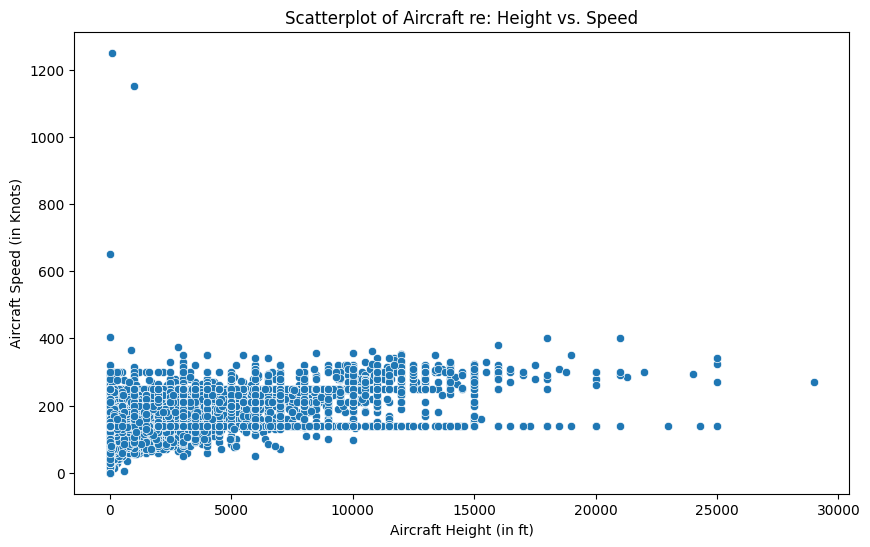

Pearson Correlation: 0.60, p-value: 0.00
The Pearson Correlation Coefficient isaround 0.6 which isn't a very high value, whereas we'd aim for something close to 1
 However, it does show a strong positive linear relationship between the two variables
There is a significant correlation between height and speed.


In [ ]:
# Question 4 - Hypothesis Testing
from scipy import stats

# Analysis of Aircraft Height and Speed
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HEIGHT', y='SPEED', data=df)
plt.title('Scatterplot of Aircraft re: Height vs. Speed')
plt.xlabel('Aircraft Height (in ft)')
plt.ylabel('Aircraft Speed (in Knots)')
plt.show()

corr, p_value = stats.pearsonr(df["HEIGHT"], df["SPEED"])
print(f"Pearson Correlation: {corr:.2f}, p-value: {p_value:.2f}")
print("The Pearson Correlation Coefficient isaround 0.6 which isn't a very high value, whereas we'd aim for something close to 1");
print(" However, it does show a strong positive linear relationship between the two variables");
if p_value < 0.05:
    print("There is a significant correlation between height and speed.")




Skewness of Approach Speed: 2.15
Skewness of Landing Roll Speed: -1.97


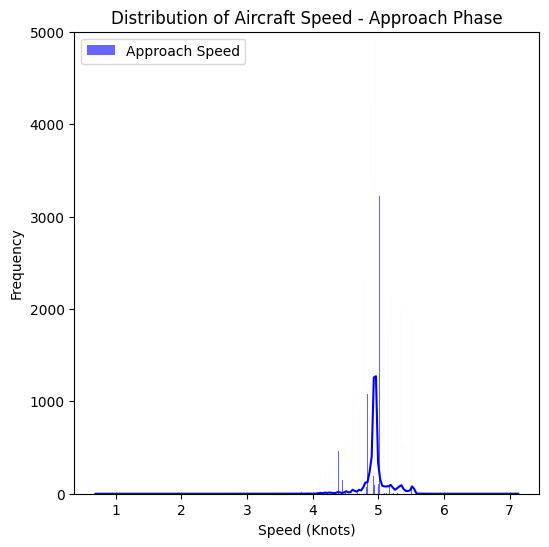

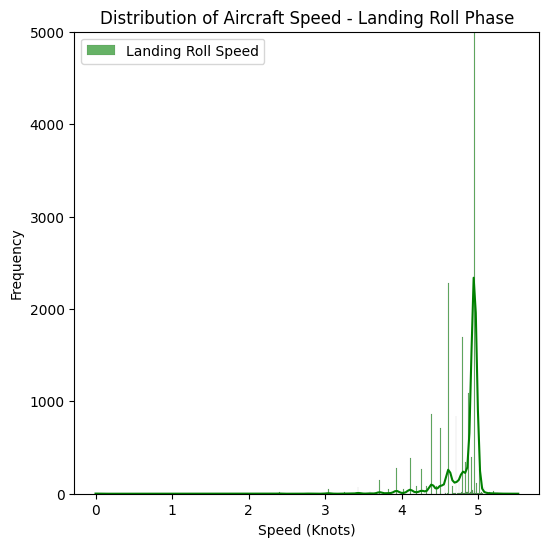

T-statistics: 91.14, p-value: 0.00

There is a significant difference in speed between the 'Approach' and 'Landing Roll' phases.


In [ ]:
# Task 2

approach_data = df[df['PHASE_OF_FLIGHT'] == 'Approach']['SPEED']
landing_roll_data = df[df['PHASE_OF_FLIGHT'] == 'Landing Roll']['SPEED']

# Check skewness of the data
approach_skewness = approach_data.skew()
landing_roll_skewness = landing_roll_data.skew()

print(f"Skewness of Approach Speed: {approach_skewness:.2f}")
print(f"Skewness of Landing Roll Speed: {landing_roll_skewness:.2f}")

# If skewness is greater than 1 or less than -1, apply a log transformation
if abs(approach_skewness) > 1:
   approach_data = np.log1p(approach_data)  # log transformation considering 0s/small value warnings in data
if abs(landing_roll_skewness) > 1:
   landing_roll_data = np.log1p(landing_roll_data)

# Plot the histograms

# Plot for Approach phase
plt.figure(figsize=(6, 6))
sns.histplot(approach_data, kde=True, color='blue', label='Approach Speed', alpha=0.6)
plt.title('Distribution of Aircraft Speed - Approach Phase')
plt.xlabel('Speed (Knots)')
plt.ylabel('Frequency')
plt.legend()
plt.ylim(0, 5000)
plt.show()

# Plot for Landing Roll phase
plt.figure(figsize=(6, 6))
sns.histplot(landing_roll_data, kde=True, color='green', label='Landing Roll Speed', alpha=0.6)
plt.title('Distribution of Aircraft Speed - Landing Roll Phase')
plt.xlabel('Speed (Knots)')
plt.ylabel('Frequency')
plt.legend()
plt.ylim(0, 5000)
plt.show()

# Perform the two-sample t-test
t_stat, p_value = stats.ttest_ind(approach_data.dropna(), landing_roll_data.dropna())

# Output the t-test results
print(f"T-statistics: {t_stat:.2f}, p-value: {p_value:.2f}")

# Evaluate if there is a significant difference
alpha = 0.05
if p_value < alpha:
    print("\nThere is a significant difference in speed between the 'Approach' and 'Landing Roll' phases.")
else:
    print("\nThere is no significant difference in speed between the 'Approach' and 'Landing Roll' phases.")

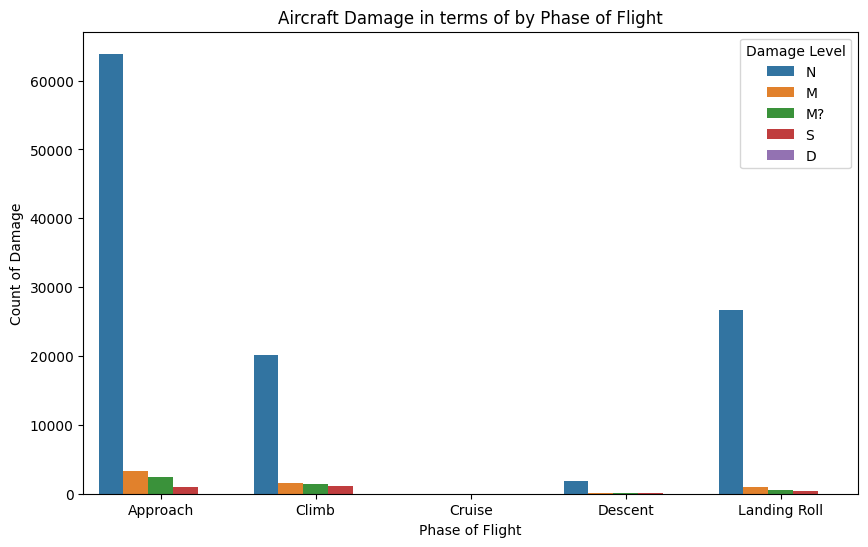

Chi-Square Test: p-value = 0.00

There is a significant relationship between phase of flight and level of damage.


In [ ]:
# Task 3: Visualization of Aircraft Damage by Phase of Flight
plt.figure(figsize=(10, 6))
sns.countplot(x='PHASE_OF_FLIGHT', hue='DAMAGE_LEVEL', data=df, order=['Approach','Climb', 'Cruise', 'Descent','Landing Roll'])
plt.title('Aircraft Damage in terms of by Phase of Flight')
plt.xlabel('Phase of Flight')
plt.ylabel('Count of Damage')
plt.legend(title='Damage Level')
plt.show()

contingency_table = pd.crosstab(df['PHASE_OF_FLIGHT'], df['DAMAGE_LEVEL'])

# We are categorizing our explanatory variable, so we use the Chi-Square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Test: p-value = {p_val:.2f}")
if p_val < 0.05:
    print("\nThere is a significant relationship between phase of flight and level of damage.")
else:
    print("\nThere is no significant relationship between phase of flight and level of damage.")

T-statistic: -55.16
P-value: 0.00


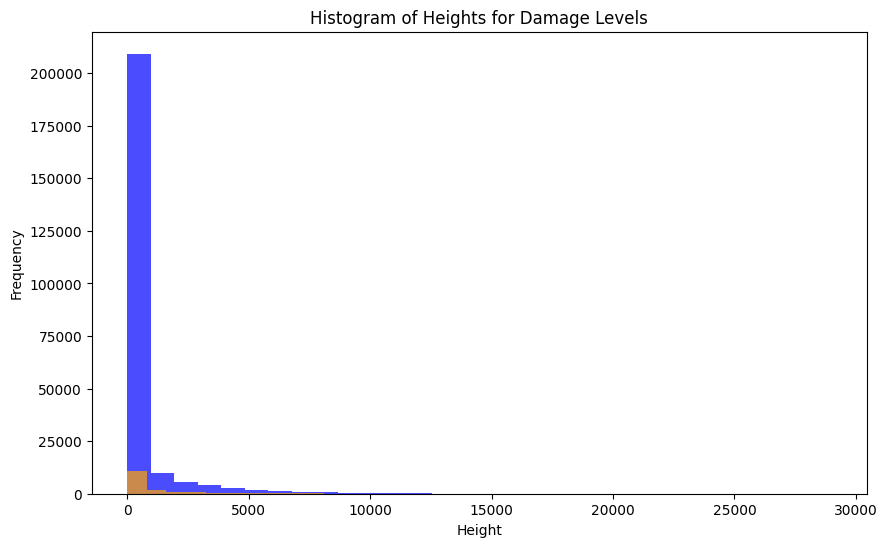


There is a significant difference in height between the 'No Damage' and 'Damage Reported' groups.


In [ ]:
 #Task 5: Additional statistical test, seeing if height influenced the amount of damage in flight incidents

# Since Damage Values are True or False (No Damage or Damage Reported), I set them to 2 and 1 respectively to do a sample test.
damage_func = {
    False: 1,  # No damage
    True: 2     # Damage reported
}

df['DAMAGE_LEVEL'] = df['INDICATED_DAMAGE'].map(damage_func)

# Filtering the data by damage levels
falsesdamageheight = df[df['DAMAGE_LEVEL'] == 1]['HEIGHT']
truedamageheight = df[df['DAMAGE_LEVEL'] == 2]['HEIGHT']

# 2 sample test
t_stat, p_value = stats.ttest_ind(falsesdamageheight.dropna(), truedamageheight.dropna())
print(f'T-statistic: {t_stat:.02f}')
print(f'P-value: {p_value:.02f}')

# Plotting histograms for No Damage vs. Damage Reported
plt.figure(figsize=(10, 6))
plt.hist(falsesdamageheight.dropna(), bins=30, alpha=0.7, color='blue')
plt.hist(truedamageheight.dropna(), bins=30, alpha=0.7, color='orange')
plt.title('Histogram of Heights for Damage Levels')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

# Evaluate if there is a significant difference
alpha = 0.05
if p_value < alpha:
    print("\nThere is a significant difference in height between the 'No Damage' and 'Damage Reported' groups.")



Explanation of Question 4:


1) We see a Pearson Correlation Coefficient of around 0.6, which makes sense looking at the scatterplot where there are speeds (eg: 100 knots) that stay consistent despite the heights of the flights at the time. Overall, there is a positive linear relationship, although not particularly the strongest (which would be around 1)

2) We see with a 2 sample t test that we do have to perform log transformations: initial skewness is: (Skewness of Approach Speed: 2.15
Skewness of Landing Roll Speed: -1.97) which should be lessened with a log transformation that I applied. From there we were able to perform the two sample t test.
Since the p-value (0.00) is less than alpha (0.05), we reject the null hypothesis. We can say that that there is a significant difference in the speed of the aircraft between the Approach and Landing Roll phases.

3) We can see using the graph and the chi-squared test that there's a significant relationship between the phase of the flight and the damage level. Particularly around "Approach".

4) We tested to see if the height influenced the amount of damage in flight incidents, or if there was damage reported. We set the T and F to 1 and 2, so we could do a 2 sample test, and saw that there was a clear significant difference in height and damage reports, with a p value of around 0.00


Question 5 — Statistical Modeling (20 points)

Explore a simple linear relationship* within the data and create a model to predict the occurrence of bird strikes in a given FAA region. Ensure that you explain all results.

Extract all data for the AWP FAA Region and use a line chart to visualize the frequency of incidents between 1990 and 2015 inclusive.
Using the extracted data above, create a simple linear regression model and predicts the incidents for 2016 and 2017.
Display the r-squared and what this indicates about your model's ability to fit the data.
Visualize the dataset from (1) and include the predicted results for 2016 and 2017.
Compare and contrast the predictions for 2016 and 2017 with the actual values.
Perform predictions for 2018 through to 2020. Explain what transpired when your model was used to predict this time period. Comment on the reliability of your model.
*Tip: It is important to remember that you are creating a simple linear regression model, which is limited in features and does not include information about all factors that influence the frequency of bird strikes. Keep this in mind while framing your response and explanations.

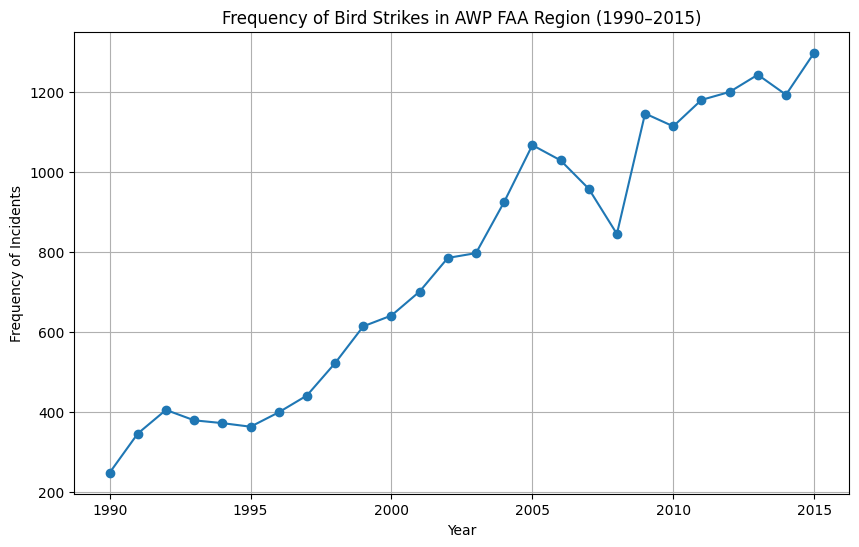

In [ ]:
#Problem 5
# Filter for AWP FAA Region and years 1990–2015
awp_data = df[(df["FAAREGION"] == "AWP") & (df["INCIDENT_YEAR"].between(1990, 2015))]

# Group by year and count incidents
incidents_by_year = awp_data.groupby("INCIDENT_YEAR").size().reset_index(name="Frequency")

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(incidents_by_year["INCIDENT_YEAR"], incidents_by_year["Frequency"], marker="o")
plt.title("Frequency of Bird Strikes in AWP FAA Region (1990–2015)")
plt.xlabel("Year")
plt.ylabel("Frequency of Incidents")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare the data
X = incidents_by_year["INCIDENT_YEAR"].values.reshape(-1, 1)  # Independent variable (Year)
y = incidents_by_year["Frequency"].values                     # Dependent variable (Frequency)

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Predict for 2016 and 2017
years_to_predict = np.array([2016, 2017]).reshape(-1, 1)
predictions = model.predict(years_to_predict)

print(f"Predicted incidents for 2016: {predictions[0]:.2f}")
print(f"Predicted incidents for 2017: {predictions[1]:.2f}")

Predicted incidents for 2016: 1365.86
Predicted incidents for 2017: 1409.52


In [ ]:
r_squared = model.score(X, y)
print(f"R-squared: {r_squared:.2f}")

R-squared: 0.95


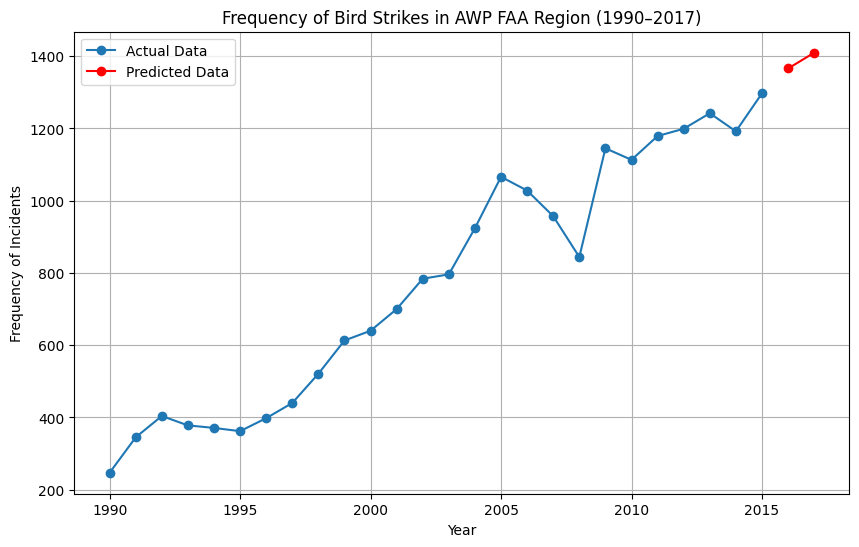

In [ ]:
# Add predictions to the dataset
predicted_years = np.append(X, years_to_predict)
predicted_frequencies = np.append(y, predictions)

# Plot the data with predictions
plt.figure(figsize=(10, 6))
plt.plot(incidents_by_year["INCIDENT_YEAR"], incidents_by_year["Frequency"], marker="o", label="Actual Data")
plt.plot([2016, 2017], predictions, marker="o", color="red", label="Predicted Data")
plt.title("Frequency of Bird Strikes in AWP FAA Region (1990–2017)")
plt.xlabel("Year")
plt.ylabel("Frequency of Incidents")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
awp_2016_2017 = df[(df["FAAREGION"] == "AWP") & (df["INCIDENT_YEAR"].isin([2016, 2017]))]

# Group by year and count incidents
actual_incidents = awp_2016_2017.groupby("INCIDENT_YEAR").size().reset_index(name="Frequency")

# Display the actual values
print(actual_incidents)

   INCIDENT_YEAR  Frequency
0           2016       1235
1           2017       1448


In [ ]:
from sklearn.metrics import mean_absolute_error

actual_values = [1235, 1448]

# Calculate error
mae = mean_absolute_error(actual_values, predictions)
print(actual_values, predictions)
print(f"Mean Absolute Error: {mae:.2f}")

[1235, 1448] [1365.85538462 1409.52273504]
Mean Absolute Error: 84.67


In [ ]:
future_years = np.array([2018, 2019, 2020]).reshape(-1, 1)
future_predictions = model.predict(future_years)

print(f"Predicted incidents for 2018: {future_predictions[0]:.2f}")
print(f"Predicted incidents for 2019: {future_predictions[1]:.2f}")
print(f"Predicted incidents for 2020: {future_predictions[2]:.2f}")

Predicted incidents for 2018: 1453.19
Predicted incidents for 2019: 1496.86
Predicted incidents for 2020: 1540.52


 Question 5 summary:

In Question 5, our goal was to analyze bird strike incidents between 1990 and 2015.

By creating a line chart, we could see how the frequency of bird strikes increases over time

The r-squared value of 0.95 means that the model can explain 95% of the data, which is very good.

The second chart shows the predicted data for 2016 and 2017 bird strikes with a mean absolute error of 84.67 when compared to the actual values

We can use the current data to predict values for future bird strike data

## Question 6 — Summary

Summarize the overall analysis for questions 1 through 5 and share THREE (3) key findings.

The overall analysis of the FAA bird strike database involved the detection of trends and statistical differences in wildlife strikes on civilian aircraft from 1990 to 2023. The data were first cleaned to correct missing values and inconsistencies before exploratory data analysis (EDA), which identified seasonal patterns and differences in strike events. The research revealed bird strikes to be more prevalent during dawn and dusk and most active during spring and autumn migration months. Statistical hypothesis testing, It was revealed that there was a significant correlation between damage and flight phase. Then, after creating a model, we found a working solution to predict bird strike data
Three Key Findings:

Temporal and Seasonal Trends: Bird strikes have increased over time, with peaks occurring during bird migration seasons and at dawn and dusk.

Altitude and Strike Risk: Most bird strikes occur at lower altitudes, particularly during takeoff and landing, where aircraft are within bird flight zones.

High-Risk Zones: Bird Strikes tend to be more prevalent closer to metropolitan areas, highlighting further correlation between altitude and frequency.




Question 7 — OPTIONAL (10 points)

This optional bonus question requires that you perform a geospatial analysis on bird strikes and visualize the results using a map. Examples include (but you are not limited to):

Mapping bird strike incidents: visualize the locations of bird strike incidents to identify hot spots or patterns
Heat maps: create heat maps to show the density of bird strike incidents in different areas.
Proximity Analysis: analyze the proximity of bird strikes to airports or landmarks
etc
Ensure that you clearly indicate the analysis that you are performing and provide detailed steps to explain ALL findings from your analysis.

Note: a thorough analysis that demonstrates multiple patterns is required to earn full credit for this question.



In [ ]:
import folium
map_center = [df['LATITUDE'].mean(), df['LONGITUDE'].mean()]  # Change to correct column names
# Create heatmap
heatmap = folium.Map(location=map_center, zoom_start=4.2)
HeatMap(df[['LATITUDE', 'LONGITUDE']].values, radius=10).add_to(heatmap)

# Display heatmap
heatmap

In [ ]:

# Drop rows with missing latitude or longitude for mapping
geo_df = df.dropna(subset=['LATITUDE', 'LONGITUDE'])

# Function to create a heatmap for a specific FAA region
def create_region_heatmap(region_name):
    region_df = geo_df[geo_df['FAAREGION'] == region_name]
    if region_df.empty:
        print(f"No data available for region: {region_name}")
        return

    map_center = [region_df['LATITUDE'].mean(), region_df['LONGITUDE'].mean()]
    region_map = folium.Map(location=map_center, zoom_start=5)
    HeatMap(region_df[['LATITUDE', 'LONGITUDE']].values, radius=10).add_to(region_map)
    display(region_map)

create_region_heatmap("AWP")

In [ ]:
create_region_heatmap("AEA") # for northeast as well.

### Heatmap Analysis:

#### **California:**
- The highest concentration of activity appears in **Sacramento, San Jose, and Los Angeles**, indicated by bright green and yellow spots.
- **Las Vegas and parts of Nevada show minor activity**, suggesting that interactions might be more localized within California itself.

#### **East Coast:**
- The **strongest concentration is around New York City**, extending into **Philadelphia, Washington D.C., and Virginia Beach**.
- **Boston and Hamilton (Canada) show some lighter activity**, suggesting some regional interaction but not as intense as NYC and D.C.

### **Comparison & Key Takeaways:**
- **California's activity is more spread out**, with key hotspots in the Bay Area and Los Angeles, while the East Coast heatmap shows a **strong, dense concentration along the urban corridor from NYC to Washington D.C.**.
- The **California heatmap suggests more localized, city-based interactions**, whereas the East Coast heatmap suggests a **network of connected urban centers** with higher overall intensity.
- Both heatmaps show **activity hotspots in major metropolitan areas**, but the **East Coast has a more continuous, dense pattern**, possibly due to its higher population density and transportation hubs.
